In [11]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, LineString, GeometryCollection, Point, MultiPoint
from shapely.affinity import translate

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.CATCH_utils import *

# Convert Workspaces and Make Cases

In [12]:
# after the dicoms receiving LL-tags 
"""
bp       = '/media/omega/Daten1/CATCH/CS'
bp_ws    = '/media/omega/Daten1/CATCH/CS/Workspaces'
bp_annos = '/media/omega/Daten1/CATCH/CS/Annos'
bp_cases = '/media/omega/Daten1/CATCH/CS/Cases'
bp_imgs  = '/media/omega/Daten1/CATCH/CS/Imgs'
"""

# basepaths
bp       = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases'
bp_annos = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Annos'
bp_cases = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Cases'
bp_imgs  = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Imgs'


In [13]:
# unpack the workspaces from ws_path to case_storage_path
#cvi42ws_paths     = [f for f in os.listdir(bp_ws) if f.endswith('cvi42ws')]
#for p in cvi42ws_paths: parse_cvi42ws(bp_ws, bp_annos, process=True, debug=True)

#parse_cvi42ws(bp_ws, bp_annos, process=True, debug=False)


# get the paths of imgs and annotations via SeriesInstanceUIDs
imgsanno_paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos)

cases = []
#sax_cine_view = SAX_CINE_View()
sax_cs_view   = SAX_CS_View()
for imgp, annop in imgsanno_paths:
    print(imgp, annop)
    st = time()
    case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos))
    #case = sax_cine_view.customize_case(case)
    case = sax_cs_view.customize_case(case)
    case.store(bp_cases)
    cases.append(case)
    print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)


/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Imgs/ECSPRESS-012 /Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Annos/1.2.276.0.7230010.3.1.2.0.458.1575883615.363792
Case customization took:  10.562855005264282 Case:  Annos ECSPRESS-012
/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Imgs/ECSPRESS-003 /Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Annos/1.2.276.0.7230010.3.1.2.0.458.1575883432.347603
Case customization took:  10.796295881271362 Case:  Annos ECSPRESS-003
/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Imgs/ECSPRESS-056 /Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Annos/1.2.276.0.7230010.3.1.2.0.458.1575884610.449611
Case customization took:  11.404074907302856 Case:  Annos ECSPRESS-056


# Load Cases and print Clinical Results

In [14]:
sax_cs_view   = SAX_CS_View()
case = pickle.load(open(os.path.join(bp, 'Cases', 'Annos_ECSPRESS-003_LL_case.pickle'), 'rb'))
print('CS data:')
case = sax_cs_view.customize_case(case)
cat = [cat for cat in case.categories][0]
print('LV endo volume curve: ', cat.get_volume_curve('lv_endo'))
print([cat.phase for cat in case.categories])
for cr in case.crs: print(cr.name, cr.get_cr())
print([cr.get_cr(string=True) for cr in case.crs])

CS data:
LV endo volume curve:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44.669443431348675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142.07685305146344]
[10, 24, 10, 24]
LVESV 44.669443431348675
LVEDV 142.07685305146344
RVESV 78.0639036578784
RVEDV 156.56378064493146
LVSV 97.40740962011478
LVEF 0.6855966156932404
RVSV 78.49987698705306
RVEF 0.5013923186077136
LVMYOMASS 90.10853059707495
RVMYOMASS 90.10853059707495
LVESP 10
RVESP 10
LVEDP 24
RVEDP 24
LVEDP 16
['44.67', '142.08', '78.06', '156.56', '97.41', '0.69', '78.50', '0.50', '90.11', '90.11', '10', '10', '24', '24', '16']


In [22]:
# load a case
case_paths = [p for p in os.listdir(bp_cases) if p.endswith('.pickle')]
cases = [pickle.load(open(os.path.join(bp_cases,p), 'rb')) for p in case_paths]
case  = cases[0]
print(case.case_name)

sax_cs_view   = SAX_CS_View()

print('CS data:')
case = sax_cs_view.customize_case(case)
cat = [cat for cat in case.categories][0]
print('LV endo volume curve: ', cat.get_volume_curve('lv_endo'))
print([cat.phase for cat in case.categories])
for cr in case.crs: print(cr.name, cr.get_cr())
st = time()
crs = [cr.get_cr(string=True) for cr in case.crs]
print("Calculating all CRs took: ", time()-st)

ECSPRESS-003
CS data:
LV endo volume curve:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44.669443431348675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142.07685305146344]
[10, 24, 10, 24]
LVESV 44.669443431348675
LVEDV 142.07685305146344
RVESV 78.0639036578784
RVEDV 156.56378064493146
LVSV 97.40740962011478
LVEF 0.6855966156932404
RVSV 78.49987698705306
RVEF 0.5013923186077136
LVMYOMASS 90.10853059707495
RVMYOMASS 90.10853059707495
LVESP 10
RVESP 10
LVEDP 24
RVEDP 24
LVEDP 16
Calculating all CRs took:  0.0683739185333252


# Checking Contours on Imgs

Nr slices:  17


/home/omega/venv/tf/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


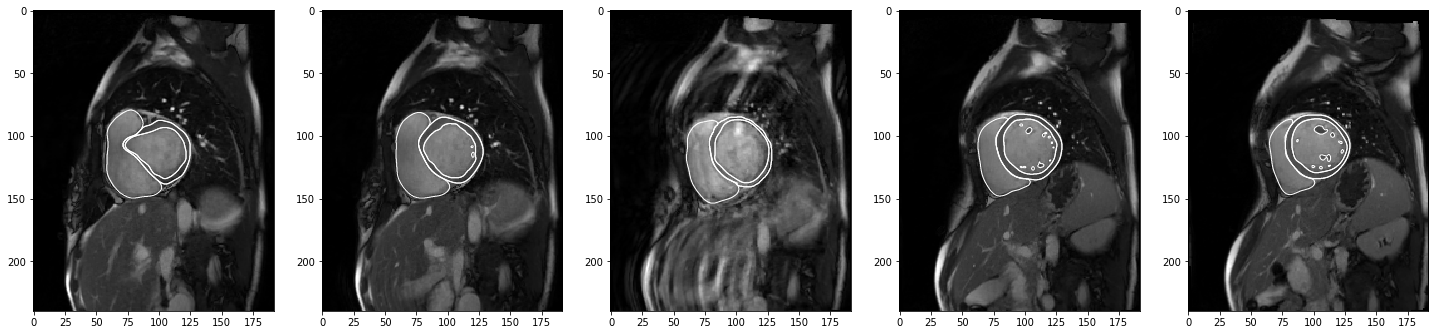

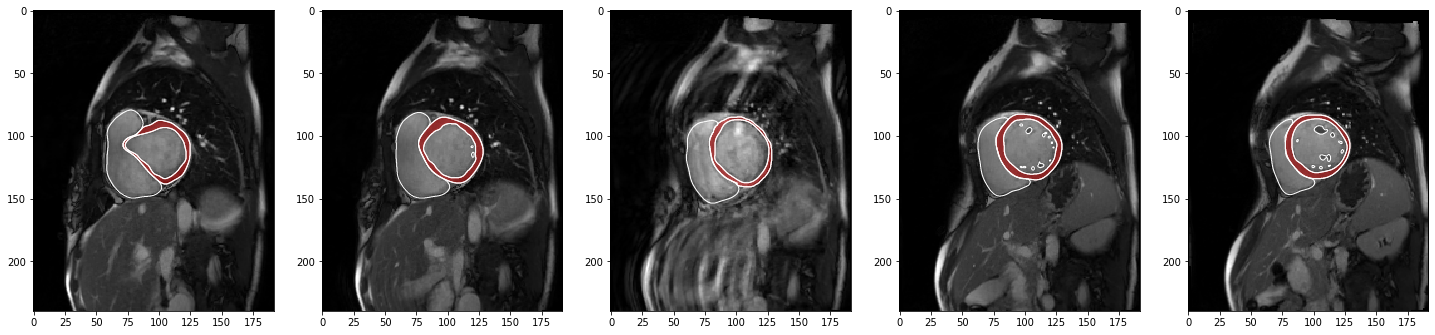

In [7]:
cat = case.categories[0]
fig, ax = plt.subplots(1,5,figsize=(25,25))
print('Nr slices: ', cat.nr_slices)
for i in range(5):
    img  = cat.get_img (2+i, 24)
    anno = cat.get_anno(2+i, 24)
    ax[i].imshow(img, interpolation='none', cmap='gray')
    if anno is not None: anno.plot_all_contour_outlines(ax[i])
plt.show()

fig, ax = plt.subplots(1,5,figsize=(25,25))
for i in range(5):
    img  = cat.get_img (2+i, 24)
    anno = cat.get_anno(2+i, 24)
    ax[i].imshow(img, interpolation='none', cmap='gray')
    anno.plot_contour_face(ax[i], 'lv_myo', c='r', alpha=0.4)
    anno.plot_all_contour_outlines(ax[i])
plt.show()

# Load Trainee Cases for Comparisons

In [5]:
#case1 = pickle.load(open('/Users/dietrichhadler/Desktop/Daten/test/data/segm1/segm1_178-lvma_LL_case.pickle', 'rb'))
#case2 = pickle.load(open('/Users/dietrichhadler/Desktop/Daten/test/data/segm2/segm2_178-lvma_LL_case.pickle', 'rb'))
case1, case2 = case, case
case1, case2 = sax_cs_view.customize_case(case1), sax_cs_view.customize_case(case2)
print(case1.crs)
print(case1.type)
case_comp = Case_Comparison(case1, case2)
print(case_comp)

[<LazyLuna.Mini_LL.LVSAX_ESV object at 0x7fea4d0823d0>, <LazyLuna.Mini_LL.LVSAX_EDV object at 0x7fea4d082460>, <LazyLuna.Mini_LL.RVSAX_ESV object at 0x7fea4d0824c0>, <LazyLuna.Mini_LL.RVSAX_EDV object at 0x7fea4d082520>, <LazyLuna.Mini_LL.LVSAX_SV object at 0x7fea4d082580>, <LazyLuna.Mini_LL.LVSAX_EF object at 0x7fea4d0825e0>, <LazyLuna.Mini_LL.RVSAX_SV object at 0x7fea4d082640>, <LazyLuna.Mini_LL.RVSAX_EF object at 0x7fea4d0826a0>, <LazyLuna.Mini_LL.LVSAX_MYO object at 0x7fea4d082700>, <LazyLuna.Mini_LL.RVSAX_MYO object at 0x7fea4d082760>, <LazyLuna.Mini_LL.LVSAX_ESPHASE object at 0x7fea4d0827c0>, <LazyLuna.Mini_LL.RVSAX_ESPHASE object at 0x7fea4d082820>, <LazyLuna.Mini_LL.LVSAX_EDPHASE object at 0x7fea4d082880>, <LazyLuna.Mini_LL.RVSAX_EDPHASE object at 0x7fea52ee0550>, <LazyLuna.Mini_LL.NR_SLICES object at 0x7fea52ee0e50>]
SAX CS


In [15]:
#case1 = sax_cine_view.customize_case(case1)
#case2 = sax_cine_view.customize_case(case2)
cr_pairs = zip(case1.crs, case2.crs)
for cr1, cr2 in cr_pairs:
    print(cr1.name, cr2.name, cr1.get_cr(), cr2.get_cr(), cr1.get_cr_diff(cr2))


LVESV LVESV 135.39412224728426 135.39412224728426 0.0
LVEDV LVEDV 244.766394881151 244.766394881151 0.0
RVESV RVESV 86.95392081416828 86.95392081416828 0.0
RVEDV RVEDV 185.48718357239068 185.48718357239068 0.0
LVSV LVSV 109.37227263386674 109.37227263386674 0.0
LVEF LVEF 0.4468435002587949 0.4468435002587949 0.0
RVSV RVSV 98.53326275822239 98.53326275822239 0.0
RVEF RVEF 0.5312133208396917 0.5312133208396917 0.0
LVMYOMASS LVMYOMASS 107.36106460105964 107.36106460105964 0.0
RVMYOMASS RVMYOMASS 107.36106460105964 107.36106460105964 0.0
LVESP LVESP 9 9 0
RVESP RVESP 9 9 0
LVEDP LVEDP 24 24 0
RVEDP RVEDP 24 24 0
LVEDP LVEDP 17 17 0


## Fast metric calculations

In [6]:
metric = HausdorffMetric()
metric.set_case_comparison(case_comp)
hausdorff_dict = metric.calculate_all_vals(True)

metric = DiceMetric()
metric.set_case_comparison(case_comp)
dice_dict = metric.calculate_all_vals(True)

metric = mlDiffMetric()
metric.set_case_comparison(case_comp)
mldiff_dict = metric.calculate_all_vals(True)

Calculating all HD values for  114  contours took:  0.7530531883239746  seconds.
Calculating all DSC values for  114  contours took:  0.34364986419677734  seconds.
Calculating all mlDiff values for  114  contours took:  0.04623222351074219  seconds.


## Get Contour Comparison Visualizations for large ml Diffs

In [7]:
for sop, c in mldiff_dict.keys():
    if np.abs(mldiff_dict[(sop,c)]) > 2:
        print(c, 'mldiff: ', mldiff_dict[(sop,c)])
        img   = case1.get_img(sop)
        anno1 = case1.load_anno(sop)
        anno2 = case2.load_anno(sop)
        if not anno1.has_contour(c) or not anno2.has_contour(c): continue
        fig, ax = plt.subplots(1,1,figsize=(10,10))
        ax.imshow(img, interpolation='none', cmap='gray')
        anno1.plot_cont_comparison(ax, anno2, c)
        plt.show()

9


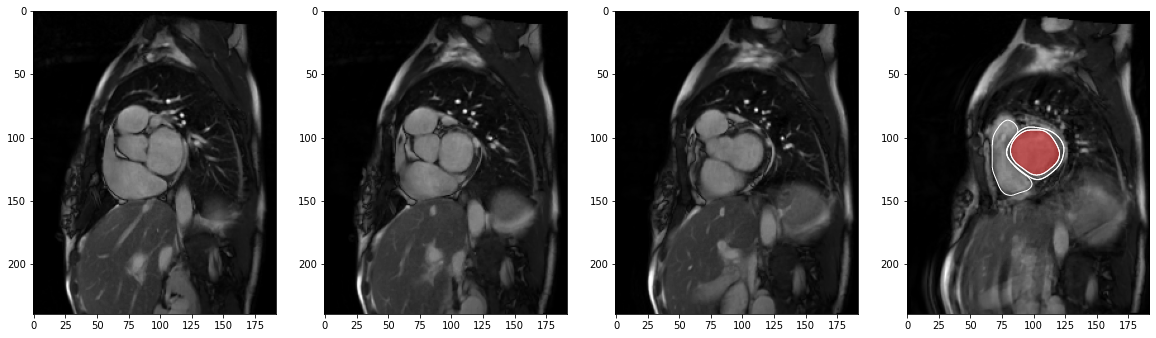

9


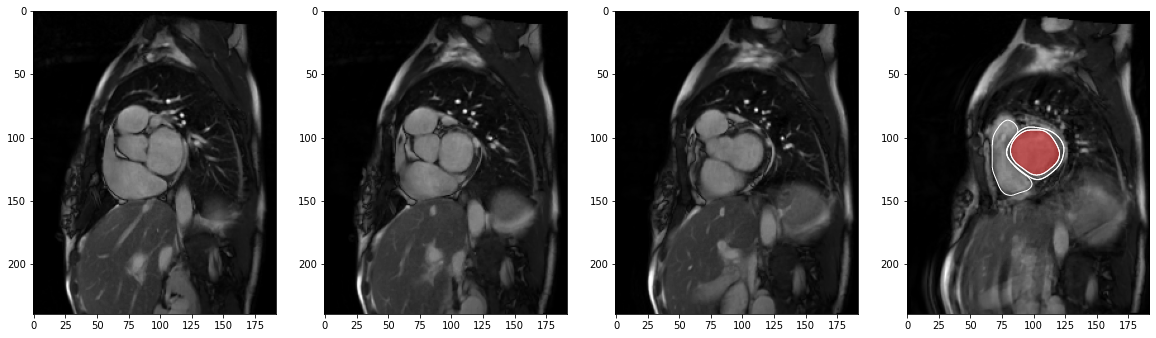

In [8]:
cat = case1.categories[0]; print(cat.phase)
fig, ax = plt.subplots(1,4,figsize=(20,20))
for i in range(4):
    img, anno = cat.get_img (1+i, cat.phase), cat.get_anno(1+i, cat.phase)
    ax[i].imshow(img, cmap='gray')
    anno.plot_contour_face(ax[i], 'lv_endo', c='r', alpha=0.4); anno.plot_all_contour_outlines(ax[i])
plt.show()
cat = case2.categories[0]; print(cat.phase)
fig, ax = plt.subplots(1,4,figsize=(20,20))
for i in range(4):
    img, anno = cat.get_img (1+i, cat.phase), cat.get_anno(1+i, cat.phase)
    ax[i].imshow(img, cmap='gray')
    anno.plot_contour_face(ax[i], 'lv_endo', c='r', alpha=0.4); anno.plot_all_contour_outlines(ax[i])
plt.show()

## Testing to_mask and to_poly function

9
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon


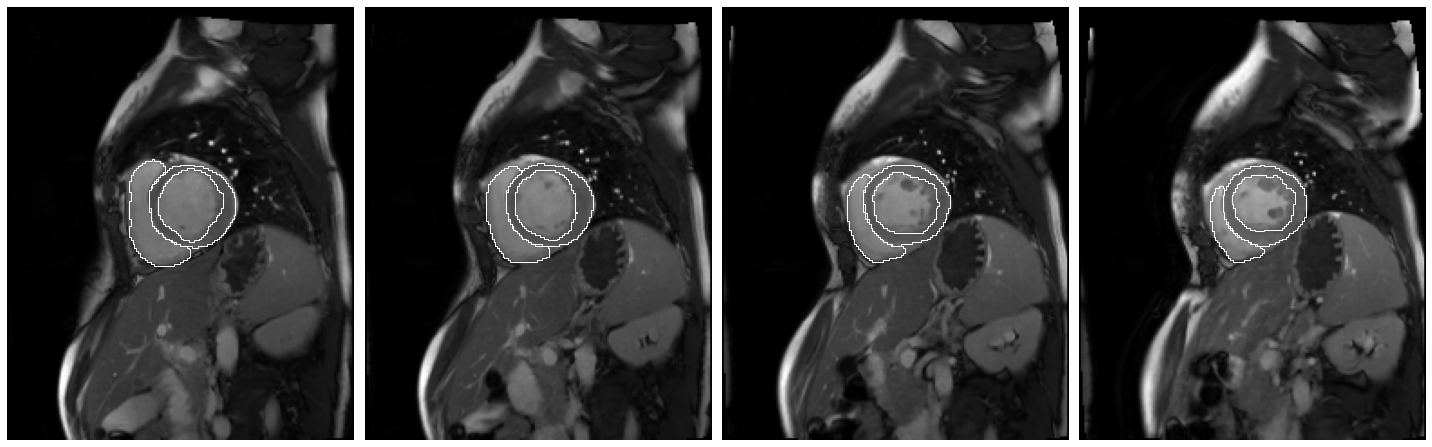

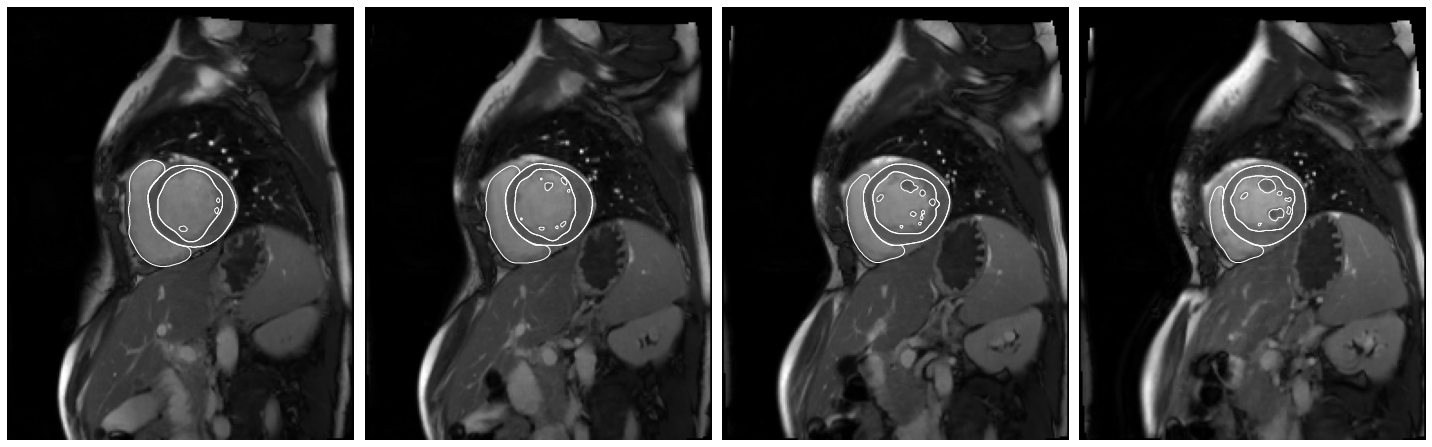

In [20]:
cat = case1.categories[0]
print(cat.phase)
fig, ax = plt.subplots(1,4,figsize=(20,20))
for i in range(4):
    img, anno = cat.get_img (5+i, cat.phase), cat.get_anno(5+i, cat.phase)
    ax[i].imshow(img, cmap='gray'); ax[i].axis('off')
    mask = CATCH_utils.to_mask(anno.get_contour('lv_endo'), 200, 200); poly = CATCH_utils.to_polygon(mask)
    if not poly.is_empty: CATCH_utils.plot_outlines(ax[i], poly)
    mask = CATCH_utils.to_mask(anno.get_contour('lv_epi'),  200, 200); poly = CATCH_utils.to_polygon(mask)
    if not poly.is_empty: CATCH_utils.plot_outlines(ax[i], poly)
    mask = CATCH_utils.to_mask(anno.get_contour('rv_endo'), 200, 200); poly = CATCH_utils.to_polygon(mask)
    if not poly.is_empty: CATCH_utils.plot_outlines(ax[i], poly)
fig.tight_layout()
plt.show()


fig, ax = plt.subplots(1,4,figsize=(20,20))
for i in range(4):
    img, anno = cat.get_img (5+i, cat.phase), cat.get_anno(5+i, cat.phase)
    ax[i].imshow(img, cmap='gray'); ax[i].axis('off')
    anno.plot_all_contour_outlines(ax[i])
fig.tight_layout()
plt.show()

## Get a Dataframe of comparisons

In [ ]:
analyzer = SAX_CINE_analyzer(case_comp)
# Reduce to first reader with argument! Get 'cross phase' with False (typically for reader comparison)
#metric = DiceMetric()
#analyzer.get_metric_values_depth_time(metric, cont_name='lv_myo', fixed_phase_first_reader=False)
table = analyzer.get_case_contour_comparison_pandas_dataframe(fixed_phase_first_reader=True, debug=True)
print(len(table))
table.iloc[40:100,:]